# Extended Research Project Model Development (xgb)

## 1. Preprocess the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 16.5 MB/s eta 0:00:00


In [3]:
!pip install scikit-learn==1.3.2 --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found 

In [1]:
# === Step 0: Import Libraries ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import optuna
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# === Step 1: Data Preparation ===
# load the data
df = pd.read_csv("/content/drive/MyDrive/ERP/XGBoost/Final_xgb_rf.csv.gz", compression="gzip")

df

,net_income_usd,total_assets_usd,shareholders_funds_usd,capital_usd,revenue_usd,schooling_years_2020,urban_pop_growth_2022,logistics_index_2018,life_expectancy_2022,female_labor_participation_2023,...,accounting_template,dm_gender,wb_category,accounting_template_missing,website_exists,description_exists,duo_bvd_id_exists,dm_gender_missing,capital_usd_missing,shareholders_funds_usd_missing
0,9.447491e+05,1.019737e+07,1.501043e+06,0.000000,3.541786e+06,10.680542,38.765999,3.273980,74.580,69.533,...,0,2,0,1,0,1,0,1,0,0
1,1.765783e+04,3.462970e+05,3.748563e+04,31153.103599,1.437969e+06,10.680542,38.765999,3.273980,74.580,69.533,...,0,2,0,1,0,1,0,1,0,0
2,-2.502728e+04,5.999055e+05,-7.393448e+04,8380.122017,1.246335e+06,10.680542,38.765999,3.273980,74.580,69.533,...,0,2,0,1,1,1,1,1,0,0
3,1.023630e+03,3.339065e+05,7.992075e+03,4190.061009,7.675140e+05,10.680542,38.765999,3.273980,74.580,69.533,...,0,2,0,1,0,1,0,1,0,0
4,6.034728e+02,3.309006e+05,5.263626e+03,4190.061009,7.037159e+05,10.680542,38.765999,3.273980,74.580,69.533,...,0,2,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477072,-9.593861e+03,6.979673e+04,6.870639e+04,85284.154826,-7.980458e+03,7.872839,87.555000,2.985790,73.425,53.205,...,0,1,1,0,0,0,0,0,0,0
477073,-1.343988e+04,4.042509e-01,-1.914622e+03,7461.924866,-1.343954e+04,7.872839,87.555000,2.985790,73.425,53.205,...,0,1,1,0,0,0,1,0,0,0
477074,-1.027999e+05,1.687618e+05,4.746779e+04,16133.758016,-9.145863e+04,9.270027,63.560001,3.605147,78.587,59.948,...,0,1,1,0,0,0,0,0,1,0
477075,-7.534849e+01,4.646490e+02,-1.208715e+02,499.056965,-9.680114e+05,9.270027,63.560001,3.605147,78.587,59.948,...,0,1,1,0,0,0,0,0,1,0


In [4]:
# create a df for classification
df_cls = df.copy()

# drop NaN
df_cls = df_cls.dropna()
df_cls.isna().sum().sum()

0

In [5]:
def create_success_flag(df):
    """
    Create a binary 'success' column based on revenue, net income, and cash flow thresholds.
    A company is considered successful if:
        - revenue_usd > 455.230 (top quartile)
        - net_income_usd > 0 (profitable)

    Parameters:
        df (pd.DataFrame): Input DataFrame containing startup financial data.

    Returns:
        df_new (pd.DataFrame): DataFrame with the added 'success' column.
        success_counts (pd.Series): Count of 0s and 1s in the 'success' column.
    """

    # Make a copy of the original DataFrame to preserve the input
    df_new = df.copy()

    # Define the success condition as a binary indicator
    # This checks whether all three conditions are met for each row
    df_new["success"] = (
        (df_new["revenue_usd"] > 455.230) &      # Top quartile of revenue
        (df_new["net_income_usd"] > 0)           # Positive net income
    ).astype(int)  # Convert boolean values to 0 or 1

    # Drop the columns used for creating the target to avoid data leakage
    df_new.drop(columns=["revenue_usd", "net_income_usd"], inplace=True)

    # Count how many startups are labeled as success (1) and not success (0)
    success_counts = df_new["success"].value_counts().sort_index()

    return df_new, success_counts

In [6]:
# create a df for classification
df_class, success_counts = create_success_flag(df_cls)
print(df_class["success"])
print(success_counts)

0         1
1         1
2         0
3         1
4         1
         ..
477072    0
477073    0
477074    0
477075    0
477076    0
Name: success, Length: 477077, dtype: int64
success
0    390322
1     86755
Name: count, dtype: int64


In [7]:
# CLASSIFICATION: Define target and feature columns
target_col_cls = "success"
feature_cols_cls = [col for col in df_class.columns if col != target_col_cls]

# Extract features and target
X_cls = df_class[feature_cols_cls].values
y_cls = df_class[target_col_cls].values

# Split into train, validation, and test sets (2D arrays only, no reshape)
X_train_cls, X_temp_cls, y_train_cls, y_temp_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)
X_val_cls, X_test_cls, y_val_cls, y_test_cls = train_test_split(X_temp_cls, y_temp_cls, test_size=0.5, random_state=42)

## 2. Define the xgb model

In [ ]:
'''
# === Step 2: Define xgb Model for classification===
# CLASSIFICATION: Define xgb model for Classification
class xgbClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(xgbClassifier, self).__init__()
        self.xgb = nn.xgb(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.xgb(x)             # xgb output
        out = out[:, -1, :]               # Use only last time step
        out = self.fc(out)                # Final classification layer
        return out
'''

'\n# === Step 2: Define xgb Model for classification===\n# CLASSIFICATION: Define xgb model for Classification\nclass xgbClassifier(nn.Module):\n    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):\n        super(xgbClassifier, self).__init__()\n        self.xgb = nn.xgb(input_size, hidden_size, num_layers,\n                            batch_first=True, dropout=dropout)\n        self.fc = nn.Linear(hidden_size, num_classes)\n\n    def forward(self, x):\n        out, _ = self.xgb(x)             # xgb output\n        out = out[:, -1, :]               # Use only last time step\n        out = self.fc(out)                # Final classification layer\n        return out\n'

## 3. Tune hyperparameters by Optuna

In [ ]:
import optuna
from sklearn.metrics import f1_score

# === Step 3: Optuna Hyperparameter Tuning for XGBoost Classification ===
def objective_xgb_cls(trial):
    # Define hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1
    }

    # Define and train the model
    model = XGBClassifier(**params)
    model.fit(X_train_cls, y_train_cls)

    # Predict on validation set
    y_pred = model.predict(X_val_cls)

    # Evaluate using weighted F1 score (maximize → minimize 1 - score)
    return 1 - f1_score(y_val_cls, y_pred, average="weighted")

# Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective_xgb_cls, n_trials=30)

# Output best hyperparameters
best_params_cls = study.best_trial.params
print("Best hyperparameters:", best_params_cls)


[I 2025-06-22 01:41:14,989] A new study created in memory with name: no-name-49bc2c6b-c894-44cf-8552-62313458dd01
[I 2025-06-22 01:43:14,966] Trial 0 finished with value: 0.12737452793411586 and parameters: {'n_estimators': 273, 'max_depth': 8, 'learning_rate': 0.23862496035247055, 'gamma': 2.7563574530856028, 'min_child_weight': 8, 'subsample': 0.8065368737400065, 'colsample_bytree': 0.6493706748800806}. Best is trial 0 with value: 0.12737452793411586.
C:\Users\teppe\anaconda3\envs\keras_env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[I 2025-06-22 01:43:35,459] Trial 1 finished with value: 0.13275410179707692 and parameters: {'n_estimators': 92, 'max_depth': 3, 'learning_rate': 0.28023390237955015, 'gamma': 1.310720503277241, 'min_child_weight': 4, 'subsample': 0.8357702968630232, 'colsample_bytree': 0.8737659740399302}. Best is trial 0 with value: 0.1273745279341158

Best hyperparameters: {'n_estimators': 273, 'max_depth': 8, 'learning_rate': 0.23862496035247055, 'gamma': 2.7563574530856028, 'min_child_weight': 8, 'subsample': 0.8065368737400065, 'colsample_bytree': 0.6493706748800806}


## 4. Re-learn with the optimized parameters

In [ ]:
# === Step 4: Train Final Model with Best Params (Classification) ===
xgb_model_cls = XGBClassifier(
    n_estimators=best_params_cls['n_estimators'],
    max_depth=best_params_cls['max_depth'],
    learning_rate=best_params_cls['learning_rate'],
    gamma=best_params_cls['gamma'],
    min_child_weight=best_params_cls['min_child_weight'],
    subsample=best_params_cls['subsample'],
    colsample_bytree=best_params_cls['colsample_bytree'],
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

# Train the model on the training set
xgb_model_cls.fit(X_train_cls, y_train_cls)

# Predict on validation set (optional)
y_proba_val = xgb_model_cls.predict_proba(X_val_cls)

# Extract probabilities for each class
prob_0 = y_proba_val[:, 0]  # Probability that class = 0
prob_1 = y_proba_val[:, 1]  # Probability that class = 1

100%|██████████| 50/50 [00:54<00:00,  1.10s/it]


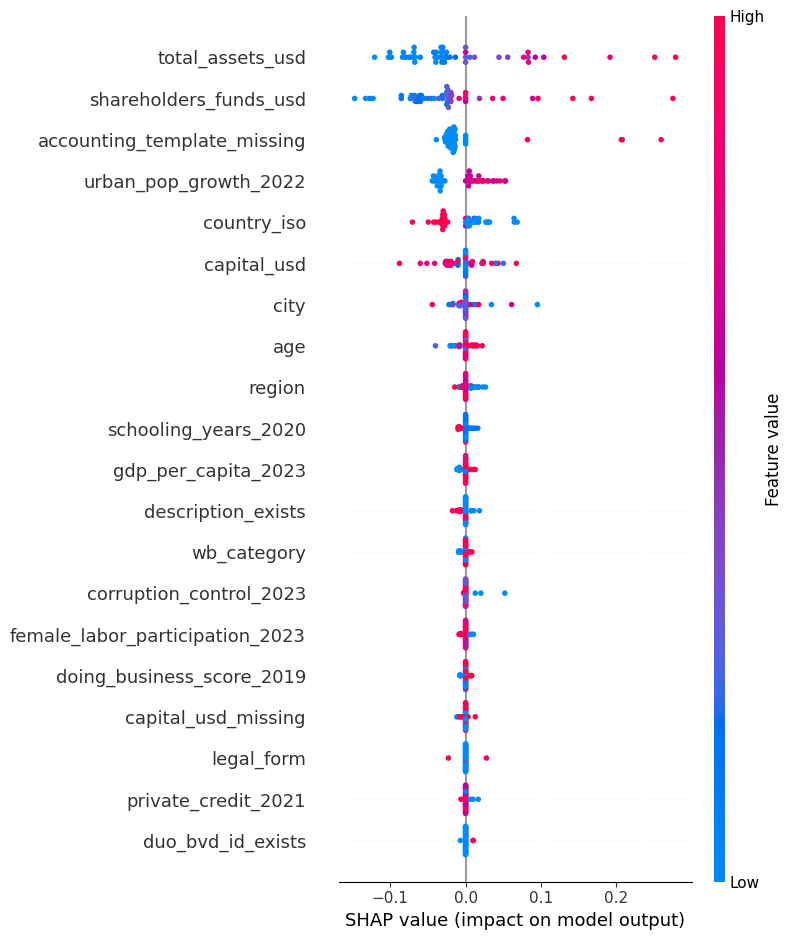

In [ ]:
import shap

# === Flatten input data if needed ===
X_train_flat = X_train_cls.reshape(X_train_cls.shape[0], -1)  # Shape: (samples, features)
X_val_flat = X_val_cls.reshape(X_val_cls.shape[0], -1)

# === Define prediction function for xgb classifier ===
def model_predict_xgb_classifier(X_numpy):
    # Return predicted probabilities for class 1
    return xgb_model_cls.predict_proba(X_numpy)[:, 1]  # Shape: (N,)

# === Select background and explanation data ===
background_data = X_train_flat[:100]       # Use a small representative sample
explanation_data = X_val_flat[:50]         # Data to explain

# === Initialize SHAP KernelExplainer ===
explainer = shap.KernelExplainer(model_predict_xgb_classifier, background_data)

# === Compute SHAP values (for classification, returns list per class) ===
shap_values = explainer.shap_values(explanation_data)  # shap_values[1] = class 1 (positive class)

# === Convert SHAP values for class 1 to DataFrame and save ===
#feature_names = [f"f{i}" for i in range(X_train_flat.shape[1])]
feature_names = feature_cols_cls if 'feature_cols_cls' in locals() else [f"f{i}" for i in range(X_train_flat.shape[1])]
shap_df = pd.DataFrame(shap_values, columns=feature_names)  # Class 1 (positive class)
shap_df.to_csv("shap_values_xgb_cls.csv", index=False)

# === Generate SHAP summary plot for class 1 ===
shap.summary_plot(shap_values, explanation_data, feature_names=feature_names)

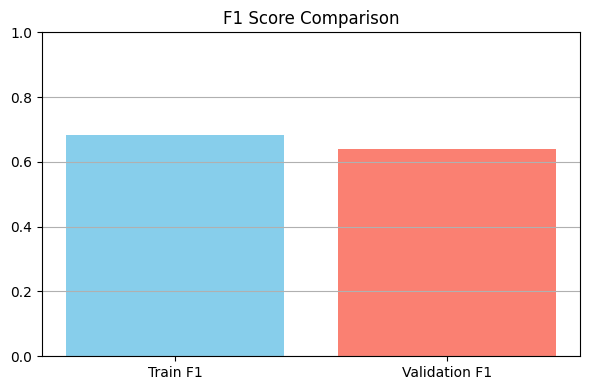

In [ ]:
y_pred_train = xgb_model_cls.predict(X_train_cls)
y_pred_val = xgb_model_cls.predict(X_val_cls)

train_f1 = f1_score(y_train_cls, y_pred_train)
val_f1 = f1_score(y_val_cls, y_pred_val)

plt.figure(figsize=(6,4))
plt.bar(["Train F1", "Validation F1"], [train_f1, val_f1], color=["skyblue", "salmon"])
plt.title("F1 Score Comparison")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

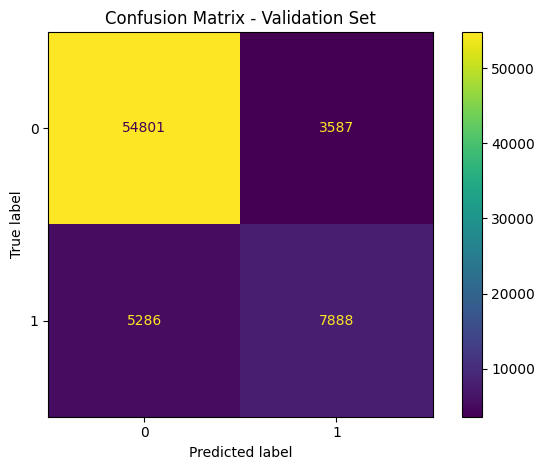

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_val_cls, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix - Validation Set")
plt.tight_layout()
plt.show()

In [ ]:
# Combine true and predicted labels with predicted probabilities
results_cls_df = pd.DataFrame({
    "true_label": y_val_cls,
    "predicted_label": y_pred_val,
    "probability_0": prob_0,   # Probability for class 0
    "probability_1": prob_1    # Probability for class 1
})

# Save to CSV without index
results_cls_df.to_csv("classification_results.csv", index=False)

# Preview
results_cls_df.head()

,true_label,predicted_label,probability_0,probability_1
0,0,0,0.999968,0.000032
1,0,0,0.999646,0.000354
2,1,0,0.898819,0.101181
3,0,0,0.910869,0.089131
4,0,0,0.998021,0.001979


## 5. Evaluate the model


--- Evaluation on Training Data ---
AUC-ROC:     0.9356
F1-Score:    0.7002
Precision:   0.6164
Recall:      0.8105
Confusion Matrix:
[[242684  30604]
 [ 11497  49168]]
Mean G-Mean: 0.8484


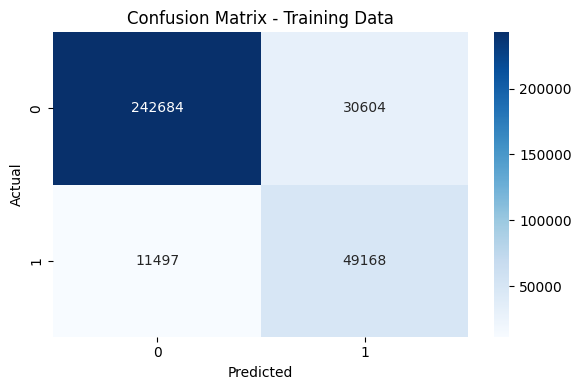


--- Evaluation on Validation Data ---
AUC-ROC:     0.9152
F1-Score:    0.6692
Precision:   0.5894
Recall:      0.7739
Confusion Matrix:
[[51286  7102]
 [ 2978 10196]]
Mean G-Mean: 0.8245


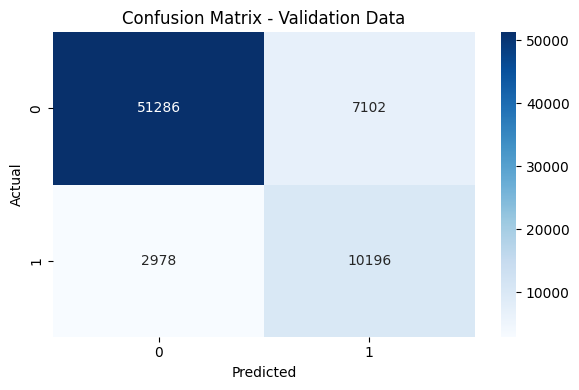


--- Evaluation on Test Data ---
AUC-ROC:     0.9175
F1-Score:    0.6693
Precision:   0.5878
Recall:      0.7770
Confusion Matrix:
[[51608  7038]
 [ 2880 10036]]
Mean G-Mean: 0.8269


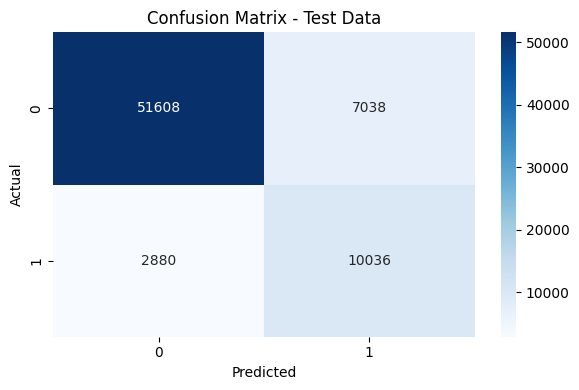

In [10]:
def evaluate_xgb_classifier(model, X, y, dataset_name="", threshold=0.3):
    """
    Evaluate a trained xgb classifier on given dataset.
    """
    # Predict probabilities and class labels
    prob = model.predict_proba(X)[:, 1]  # Probability of class 1
    preds = (prob > threshold).astype(int)     # Apply threshold

    # Metrics
    auc = roc_auc_score(y, prob)
    f1 = f1_score(y, preds)
    precision = precision_score(y, preds)
    recall = recall_score(y, preds)
    conf_matrix = confusion_matrix(y, preds)

    # G-Mean
    tn, fp, fn, tp = conf_matrix.ravel()
    tpr = tp / (tp + fn + 1e-6)
    tnr = tn / (tn + fp + 1e-6)
    gmean = np.sqrt(tpr * tnr)

    # Print results
    print(f"\n--- Evaluation on {dataset_name} ---")
    print(f"AUC-ROC:     {auc:.4f}")
    print(f"F1-Score:    {f1:.4f}")
    print(f"Precision:   {precision:.4f}")
    print(f"Recall:      {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Mean G-Mean: {gmean:.4f}")

    # Confusion matrix plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

evaluate_xgb_classifier(xgb_model_cls, X_train_cls, y_train_cls, "Training Data")
evaluate_xgb_classifier(xgb_model_cls, X_val_cls, y_val_cls, "Validation Data")
evaluate_xgb_classifier(xgb_model_cls, X_test_cls, y_test_cls, "Test Data")


--- Evaluation on Test Data @ 0.3 ---
AUC-ROC:     0.9175
F1-Score:    0.6693
Precision:   0.5878
Recall:      0.7770
Confusion Matrix:
[[51608  7038]
 [ 2880 10036]]
Mean G-Mean: 0.8269


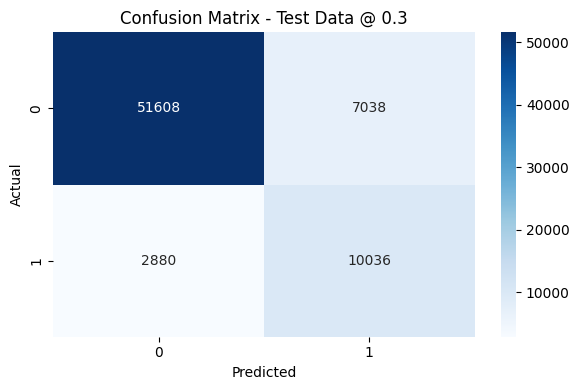


--- Evaluation on Test Data @ 0.1 ---
AUC-ROC:     0.9175
F1-Score:    0.6394
Precision:   0.6842
Recall:      0.6001
Confusion Matrix:
[[55068  3578]
 [ 5165  7751]]
Mean G-Mean: 0.7507


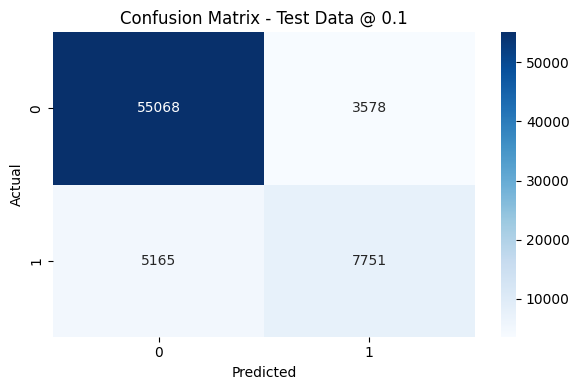


--- Evaluation on Test Data @ 0.5 ---
AUC-ROC:     0.9175
F1-Score:    0.5869
Precision:   0.4279
Recall:      0.9340
Confusion Matrix:
[[42517 16129]
 [  852 12064]]
Mean G-Mean: 0.8229


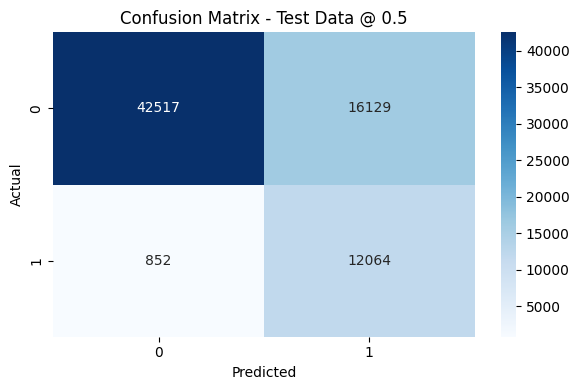

In [ ]:
evaluate_xgb_classifier(xgb_model_cls, X_test_cls, y_test_cls, "Test Data @ 0.3", threshold=0.3)
evaluate_xgb_classifier(xgb_model_cls, X_test_cls, y_test_cls, "Test Data @ 0.1", threshold=0.5)
evaluate_xgb_classifier(xgb_model_cls, X_test_cls, y_test_cls, "Test Data @ 0.5", threshold=0.1)

## 6. Save the model

In [ ]:
import joblib
import pandas as pd

# Save trained xgb model
joblib.dump(xgb_model_cls, "xgb_cls_model.pkl")

# Save best hyperparameters as CSV
params_df = pd.DataFrame([best_params_cls])
params_df.to_csv("best_params_cls.csv", index=False)

# Save StandardScaler
#joblib.dump(scaler, "scaler.pkl")

## Optional: load the model

In [8]:
'''
import joblib

# Load best hyperparameters from CSV
loaded_params_df = pd.read_csv("best_params_cls.csv")
best_params_cls = loaded_params_df.iloc[0].to_dict()

# Convert integer-like float values to int
best_params_cls['n_neighbors'] = int(best_params_cls['n_neighbors'])
best_params_cls['p'] = int(best_params_cls['p'])
'''

# Load trained xgb model
xgb_model_cls = joblib.load("/content/drive/MyDrive/ERP/XGBoost/xgb_cls_model.pkl")

# Load scaler
#scaler = joblib.load("scaler.pkl")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:43:42] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)
